In [1]:
import numpy as np
import random
import math
import matplotlib
import matplotlib.pyplot as plt

In [15]:
# Initial conditions
n = 100 # number of trash
m = 5 # size of grid
k = 6 # number of agents
mu = [3, 2] # center of trash pile
sig = [[0.1, 0], [0, 0.1]] # spread of pile
var = 0.1 # error in measurements

field = np.zeros((m,m))# array of trash pieces dispersed on field
visits = np.zeros((k,m,m))# array to track number of visits to each gridpoint
reward = np.zeros((k,m,m))# array of sum of rewards from each gridpoint
expected_mean = np.zeros((k,m,m)) # array of expected mean of each gridpoint

T = n # number of time steps
delta = 1 # amount reward decreases per visit
xi = 2 # constant xi > 1
gamma = 6 # max message length
thresh = 4 # threshold for trash at a given point

messageSent = {}# dict {agent: list of messages to send - tuple [agent, time, arm, reward]}
messageRec = {}# dict {agent: list of messages received - tuple [agent, time, arm, reward]}


[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0. 23. 16.  0.  0.]
 [ 0. 22. 39.  0.  0.]
 [ 0.  0.  0.  0.  0.]]
Degree: 0
t: 1
(3, 2)
[[ 0.  -0.1 -0.1  0.1 -0.2]
 [-0.1 -0.2  0.  -0.1  0. ]
 [ 0.1 22.9 16.   0.   0. ]
 [ 0.1 22.1 39.  -0.1  0. ]
 [ 0.   0.1 -0.1  0.  -0.2]]
(3, 2)
[[ 0.1  0.1  0.   0.2 -0.1]
 [ 0.1 -0.1  0.1  0.  -0.2]
 [-0.1 23.1 16.1  0.2  0.1]
 [ 0.1 22.1 39.  -0.1  0. ]
 [ 0.   0.   0.  -0.1  0. ]]
(3, 2)
[[ 0.1  0.1  0.   0.1  0.1]
 [-0.1  0.   0.1  0.   0.2]
 [ 0.1 22.9 15.9  0.  -0.1]
 [-0.1 21.9 39.2  0.   0. ]
 [ 0.   0.1  0.   0.1 -0.1]]
(3, 2)
[[-0.1 -0.2 -0.1  0.2  0.3]
 [-0.1  0.  -0.1 -0.1  0.3]
 [ 0.  22.9 15.9  0.1  0. ]
 [-0.1 22.  39.1  0.  -0.1]
 [-0.1  0.   0.1 -0.1 -0.2]]
(3, 2)
[[-0.1 -0.1  0.   0.   0.2]
 [ 0.2  0.  -0.1  0.   0.1]
 [-0.1 23.  16.1  0.  -0.1]
 [-0.1 22.  39.   0.  -0.2]
 [ 0.   0.1  0.  -0.1  0.1]]
(3, 2)
[[ 0.   0.   0.1  0.1  0. ]
 [-0.1  0.  -0.1  0.   0. ]
 [ 0.1 23.  15.9  0.  -0.1]
 [ 0.  22.1 38.9  0.2  0. ]
 [ 0.   0.

(3, 2)
[[ 0.15674255  0.05674255  0.15674255  0.45674255  0.55674255]
 [ 0.15674255  0.25674255  0.15674255  0.15674255  0.55674255]
 [ 0.25674255 23.15674255 16.15674255  0.35674255  0.25674255]
 [ 0.15674255 22.25674255 35.51489705  0.25674255  0.15674255]
 [ 0.15674255  0.25674255  0.35674255  0.15674255  0.05674255]]
(3, 2)
[[ 0.15674255  0.15674255  0.25674255  0.25674255  0.45674255]
 [ 0.45674255  0.25674255  0.15674255  0.25674255  0.35674255]
 [ 0.15674255 23.25674255 16.35674255  0.25674255  0.15674255]
 [ 0.15674255 22.25674255 35.41489705  0.25674255  0.05674255]
 [ 0.25674255  0.35674255  0.25674255  0.15674255  0.35674255]]
(3, 2)
[[ 0.25674255  0.25674255  0.35674255  0.35674255  0.25674255]
 [ 0.15674255  0.25674255  0.15674255  0.25674255  0.25674255]
 [ 0.35674255 23.25674255 16.15674255  0.25674255  0.15674255]
 [ 0.25674255 22.35674255 35.51489705  0.45674255  0.25674255]
 [ 0.25674255  0.45674255  0.05674255  0.35674255  0.35674255]]
0
[[ 0.00e+00 -1.00e-01 -1.00e-

 [ 0.000e+00  1.000e-01  0.000e+00 -1.000e-01  1.000e-01]]
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 7. 1. 1.]
 [1. 1. 1. 1. 1.]]
[[-0.1        -0.1         0.          0.          0.2       ]
 [ 0.2         0.         -0.1         0.          0.1       ]
 [-0.1        23.         16.1         0.         -0.1       ]
 [-0.1        22.         22.22857143  0.         -0.2       ]
 [ 0.          0.1         0.         -0.1         0.1       ]]
5
[[ 0.000e+00  0.000e+00  1.000e-01  1.000e-01  0.000e+00]
 [-1.000e-01  0.000e+00 -1.000e-01  0.000e+00  0.000e+00]
 [ 1.000e-01  2.300e+01  1.590e+01  0.000e+00 -1.000e-01]
 [ 0.000e+00  2.210e+01  1.563e+02  2.000e-01  0.000e+00]
 [ 0.000e+00  2.000e-01 -2.000e-01  1.000e-01  1.000e-01]]
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 7. 1. 1.]
 [1. 1. 1. 1. 1.]]
[[ 0.          0.          0.1         0.1         0.        ]
 [-0.1         0.         -0.1         0.          0.        ]
 [ 0.1        23.       

(3, 1)
[[ 0.37930689  0.37930689  0.47930689  0.47930689  0.37930689]
 [ 0.27930689  0.37930689  0.27930689  0.37930689  0.37930689]
 [ 0.47930689 19.25232627 16.27930689  0.37930689  0.27930689]
 [ 0.37930689 20.16821047 19.04660524  0.57930689  0.37930689]
 [ 0.37930689  0.57930689  0.17930689  0.47930689  0.47930689]]
0
[[ 0.000e+00 -1.000e-01 -1.000e-01  1.000e-01 -2.000e-01]
 [-1.000e-01 -2.000e-01  0.000e+00 -1.000e-01  0.000e+00]
 [ 1.000e-01  5.670e+01  1.600e+01  0.000e+00  0.000e+00]
 [ 1.000e-01  5.530e+01  1.469e+02 -1.000e-01  0.000e+00]
 [ 0.000e+00  1.000e-01 -1.000e-01  0.000e+00 -2.000e-01]]
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 3. 1. 1. 1.]
 [1. 3. 8. 1. 1.]
 [1. 1. 1. 1. 1.]]
[[ 0.         -0.1        -0.1         0.1        -0.2       ]
 [-0.1        -0.2         0.         -0.1         0.        ]
 [ 0.1        18.9        16.          0.          0.        ]
 [ 0.1        18.43333333 18.3625     -0.1         0.        ]
 [ 0.          0.1        -0.1         0.

 [ 0.000e+00  0.000e+00  0.000e+00 -1.000e-01  0.000e+00]]
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 4. 2. 1. 1.]
 [1. 4. 9. 1. 1.]
 [1. 1. 1. 1. 1.]]
[[ 0.1         0.1         0.          0.2        -0.1       ]
 [ 0.1        -0.1         0.1         0.         -0.2       ]
 [-0.1        15.75       15.05        0.2         0.1       ]
 [ 0.1        15.525      14.51111111 -0.1         0.        ]
 [ 0.          0.          0.         -0.1         0.        ]]
2
[[ 1.000e-01  1.000e-01  0.000e+00  1.000e-01  1.000e-01]
 [-1.000e-01  0.000e+00  1.000e-01  0.000e+00  2.000e-01]
 [ 1.000e-01  6.500e+01  2.990e+01  0.000e+00 -1.000e-01]
 [-1.000e-01  4.490e+01  1.397e+02  0.000e+00  0.000e+00]
 [ 0.000e+00  1.000e-01  0.000e+00  1.000e-01 -1.000e-01]]
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 5. 2. 1. 1.]
 [1. 3. 9. 1. 1.]
 [1. 1. 1. 1. 1.]]
[[ 0.1         0.1         0.          0.1         0.1       ]
 [-0.1         0.          0.1         0.          0.2       ]
 [ 0.1        13.       

[[-0.1        -0.1         0.          0.          0.2       ]
 [ 0.2         0.         -0.1         0.          0.1       ]
 [-0.1        12.44       12.06666667  0.         -0.1       ]
 [-0.1        14.25       11.75        0.         -0.2       ]
 [ 0.          0.1         0.         -0.1         0.1       ]]
5
[[ 0.000e+00  0.000e+00  1.000e-01  1.000e-01  0.000e+00]
 [-1.000e-01  0.000e+00 -1.000e-01  0.000e+00  0.000e+00]
 [ 1.000e-01  6.200e+01  3.560e+01  0.000e+00 -1.000e-01]
 [ 0.000e+00  5.650e+01  1.182e+02  2.000e-01  0.000e+00]
 [ 0.000e+00  2.000e-01 -2.000e-01  1.000e-01  1.000e-01]]
[[ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  5.  3.  1.  1.]
 [ 1.  4. 10.  1.  1.]
 [ 1.  1.  1.  1.  1.]]
[[ 0.          0.          0.1         0.1         0.        ]
 [-0.1         0.         -0.1         0.          0.        ]
 [ 0.1        12.4        11.86666667  0.         -0.1       ]
 [ 0.         14.125      11.82        0.2         0.        ]
 [ 0.          0.2     

 [ 0.000e+00  1.000e-01  0.000e+00 -1.000e-01  1.000e-01]]
[[ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  6.  3.  1.  1.]
 [ 1.  5. 10.  1.  1.]
 [ 1.  1.  1.  1.  1.]]
[[-0.1        -0.1         0.          0.          0.2       ]
 [ 0.2         0.         -0.1         0.          0.1       ]
 [-0.1         9.08333333 12.06666667  0.         -0.1       ]
 [-0.1        10.8        11.75        0.         -0.2       ]
 [ 0.          0.1         0.         -0.1         0.1       ]]
5
[[ 0.000e+00  0.000e+00  1.000e-01  1.000e-01  0.000e+00]
 [-1.000e-01  0.000e+00 -1.000e-01  0.000e+00  0.000e+00]
 [ 1.000e-01  5.390e+01  3.560e+01  0.000e+00 -1.000e-01]
 [ 0.000e+00  5.350e+01  1.182e+02  2.000e-01  0.000e+00]
 [ 0.000e+00  2.000e-01 -2.000e-01  1.000e-01  1.000e-01]]
[[ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  6.  3.  1.  1.]
 [ 1.  5. 10.  1.  1.]
 [ 1.  1.  1.  1.  1.]]
[[ 0.          0.          0.1         0.1         0.        ]
 [-0.1         0.         -0.1       

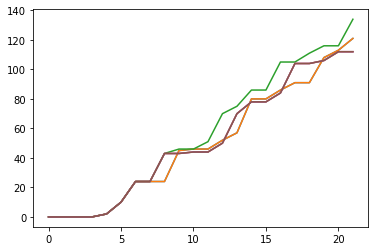

Degree: 1
t: 1
(3, 2)
[[ 0.1 -0.3  0.   0.  -0.2]
 [ 0.   0.1 -0.1  0.1  0.2]
 [-0.1 23.1 16.1 -0.1  0. ]
 [ 0.2 22.  39.  -0.1  0.2]
 [-0.1  0.1  0.   0.   0.1]]
(3, 2)
[[ 0.1  0.  -0.1  0.1  0. ]
 [ 0.1  0.   0.  -0.1  0.1]
 [-0.3 23.  16.1  0.   0. ]
 [ 0.2 21.9 39.1 -0.1 -0.1]
 [-0.2  0.1 -0.1 -0.2  0. ]]
(3, 2)
[[ 0.1 -0.2  0.   0.   0. ]
 [-0.1  0.1  0.   0.   0.1]
 [-0.1 22.9 15.9  0.  -0.1]
 [-0.1 22.  38.8 -0.1 -0.1]
 [-0.1  0.   0.   0.1  0. ]]
(3, 2)
[[-0.1  0.  -0.1  0.   0. ]
 [-0.1  0.  -0.2  0.   0. ]
 [ 0.  23.  16.  -0.1 -0.2]
 [ 0.  22.1 39.2  0.2 -0.1]
 [ 0.   0.   0.   0.   0.1]]
(3, 2)
[[-0.1  0.1 -0.1  0.  -0.1]
 [ 0.   0.2  0.1  0.   0. ]
 [ 0.  23.  16.1  0.   0. ]
 [-0.1 22.  39.1  0.  -0.1]
 [ 0.   0.1  0.  -0.1  0. ]]
(3, 2)
[[ 0.1  0.  -0.1 -0.1  0.1]
 [-0.1  0.  -0.1  0.  -0.1]
 [ 0.  23.  15.9 -0.2 -0.1]
 [ 0.  22.1 38.9 -0.1  0.1]
 [-0.1 -0.2  0.  -0.1  0.1]]
0
[[ 1.000e-01 -3.000e-01  0.000e+00  0.000e+00 -2.000e-01]
 [ 0.000e+00  1.000e-01 -1.000e-01  1

 [ 0.000e+00  1.000e-01  0.000e+00 -1.000e-01  0.000e+00]]
[[ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  3.  1.  1.  1.]
 [ 1.  3. 13.  1.  1.]
 [ 1.  1.  1.  1.  1.]]
[[-0.1         0.1        -0.1         0.         -0.1       ]
 [ 0.          0.2         0.1         0.          0.        ]
 [ 0.         21.         16.1         0.          0.        ]
 [-0.1        20.         17.78461538  0.         -0.1       ]
 [ 0.          0.1         0.         -0.1         0.        ]]
5
[[ 1.000e-01  0.000e+00 -1.000e-01 -1.000e-01  1.000e-01]
 [-1.000e-01  0.000e+00 -1.000e-01  0.000e+00 -1.000e-01]
 [ 0.000e+00  6.290e+01  1.590e+01 -2.000e-01 -1.000e-01]
 [ 0.000e+00  5.980e+01  2.305e+02 -1.000e-01  1.000e-01]
 [-1.000e-01 -2.000e-01  0.000e+00 -1.000e-01  1.000e-01]]
[[ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  3.  1.  1.  1.]
 [ 1.  3. 13.  1.  1.]
 [ 1.  1.  1.  1.  1.]]
[[ 0.1         0.         -0.1        -0.1         0.1       ]
 [-0.1         0.         -0.1       

 [-0.1         0.1         0.          0.          0.1       ]]
1
[[ 1.000e-01  0.000e+00 -1.000e-01  1.000e-01  0.000e+00]
 [ 1.000e-01  0.000e+00  0.000e+00 -1.000e-01  1.000e-01]
 [-3.000e-01  9.510e+01  1.610e+01  0.000e+00  0.000e+00]
 [ 2.000e-01  8.810e+01  2.072e+02 -1.000e-01 -1.000e-01]
 [-2.000e-01  1.000e-01 -1.000e-01 -2.000e-01  0.000e+00]]
[[ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  7.  1.  1.  1.]
 [ 1.  7. 15.  1.  1.]
 [ 1.  1.  1.  1.  1.]]
[[ 0.1         0.         -0.1         0.1         0.        ]
 [ 0.1         0.          0.         -0.1         0.1       ]
 [-0.3        13.58571429 16.1         0.          0.        ]
 [ 0.2        12.58571429 13.81333333 -0.1        -0.1       ]
 [-0.2         0.1        -0.1        -0.2         0.        ]]
2
[[ 1.000e-01 -2.000e-01  0.000e+00  0.000e+00  0.000e+00]
 [-1.000e-01  1.000e-01  0.000e+00  0.000e+00  1.000e-01]
 [-1.000e-01  9.480e+01  1.590e+01  0.000e+00 -1.000e-01]
 [-1.000e-01  8.800e+01  2.064e+02 

 [ 0.21230183  0.51230183  0.31230183  0.21230183  0.41230183]]
(2, 1)
[[ 0.51230183  0.21230183  0.41230183  0.41230183  0.41230183]
 [ 0.31230183  0.51230183  0.41230183  0.41230183  0.51230183]
 [ 0.31230183 13.69869259 10.56438698  0.41230183  0.31230183]
 [ 0.31230183 12.72726402  9.89411553  0.31230183  0.31230183]
 [ 0.31230183  0.41230183  0.41230183  0.51230183  0.41230183]]
(2, 1)
[[ 0.31230183  0.41230183  0.31230183  0.41230183  0.41230183]
 [ 0.31230183  0.41230183  0.21230183  0.41230183  0.41230183]
 [ 0.41230183 13.75583544 10.56438698  0.31230183  0.21230183]
 [ 0.41230183 12.77012116  9.935292    0.61230183  0.31230183]
 [ 0.41230183  0.41230183  0.41230183  0.41230183  0.51230183]]
(2, 1)
[[ 0.31230183  0.51230183  0.31230183  0.41230183  0.31230183]
 [ 0.41230183  0.61230183  0.51230183  0.41230183  0.41230183]
 [ 0.41230183 13.74154973 10.60438698  0.41230183  0.41230183]
 [ 0.31230183 12.75583544  9.94705671  0.41230183  0.31230183]
 [ 0.41230183  0.51230183  0.41

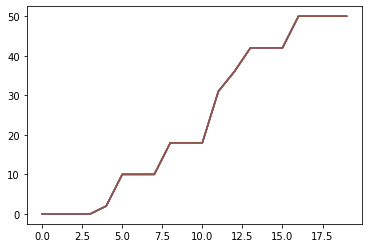

Degree: 2
t: 1
(3, 2)
[[ 0.   0.   0.3 -0.1  0. ]
 [ 0.   0.1  0.  -0.1 -0.1]
 [-0.1 22.9 16.   0.1  0. ]
 [-0.1 22.  38.9  0.   0.1]
 [ 0.   0.1  0.1 -0.1 -0.2]]
(3, 2)
[[ 0.1  0.1  0.1  0.2  0. ]
 [ 0.1 -0.1  0.   0.2 -0.1]
 [ 0.  23.2 16.   0.2  0.2]
 [ 0.  22.  39.1  0.2  0.1]
 [ 0.3  0.1  0.   0.1 -0.2]]
(3, 2)
[[ 0.1  0.1 -0.1 -0.1  0.1]
 [-0.1  0.1  0.   0.  -0.2]
 [-0.1 23.  16.3 -0.2  0. ]
 [-0.1 21.9 38.9  0.2  0. ]
 [-0.1  0.1 -0.1  0.   0. ]]
(3, 2)
[[ 0.   0.  -0.1  0.1  0. ]
 [ 0.   0.1  0.  -0.1  0. ]
 [ 0.  23.  15.9  0.   0.2]
 [ 0.  22.1 38.9  0.   0.1]
 [-0.1  0.1 -0.2  0.   0.1]]
(3, 2)
[[ 0.  -0.2  0.   0.   0. ]
 [ 0.1 -0.1  0.   0.  -0.1]
 [-0.1 22.9 16.1 -0.1  0. ]
 [-0.1 22.1 39.1 -0.1  0.1]
 [ 0.   0.4 -0.1  0.   0. ]]
(3, 2)
[[-0.2 -0.1 -0.1  0.1 -0.1]
 [-0.1  0.2 -0.1  0.   0.1]
 [ 0.1 23.1 16.  -0.2 -0.1]
 [ 0.  22.  39.   0.  -0.1]
 [ 0.   0.1  0.1  0.1  0. ]]
0
[[ 0.000e+00  0.000e+00  3.000e-01 -1.000e-01  0.000e+00]
 [ 0.000e+00  1.000e-01  0.000e+00 -1

[[ 0.   -0.2   0.    0.    0.  ]
 [ 0.1  -0.1   0.    0.   -0.1 ]
 [-0.1  22.9  16.1  -0.1   0.  ]
 [-0.1  22.1  27.32 -0.1   0.1 ]
 [ 0.    0.4  -0.1   0.    0.  ]]
5
[[-2.000e-01 -1.000e-01 -1.000e-01  1.000e-01 -1.000e-01]
 [-1.000e-01  2.000e-01 -1.000e-01  0.000e+00  1.000e-01]
 [ 1.000e-01  2.310e+01  1.600e+01 -2.000e-01 -1.000e-01]
 [ 0.000e+00  2.200e+01  2.731e+02  0.000e+00 -1.000e-01]
 [ 0.000e+00  1.000e-01  1.000e-01  1.000e-01  0.000e+00]]
[[ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1. 10.  1.  1.]
 [ 1.  1.  1.  1.  1.]]
[[-0.2  -0.1  -0.1   0.1  -0.1 ]
 [-0.1   0.2  -0.1   0.    0.1 ]
 [ 0.1  23.1  16.   -0.2  -0.1 ]
 [ 0.   22.   27.31  0.   -0.1 ]
 [ 0.    0.1   0.1   0.1   0.  ]]
[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0. 23. 16.  0.  0.]
 [ 0. 22. 21.  0.  0.]
 [ 0.  0.  0.  0.  0.]]
t: 4
(3, 2)
[[ 0.28840538  0.28840538  0.58840538  0.18840538  0.28840538]
 [ 0.28840538  0.38840538  0.28840538  0.18840538  0.18840538]
 [ 0.

 [ 3.00e-01  1.00e-01  0.00e+00  1.00e-01 -2.00e-01]]
[[ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  4.  1.  1.  1.]
 [ 1.  1. 16.  1.  1.]
 [ 1.  1.  1.  1.  1.]]
[[ 0.1    0.1    0.1    0.2    0.   ]
 [ 0.1   -0.1    0.     0.2   -0.1  ]
 [ 0.    20.075 16.     0.2    0.2  ]
 [ 0.    22.    18.375  0.2    0.1  ]
 [ 0.3    0.1    0.     0.1   -0.2  ]]
2
[[ 1.000e-01  1.000e-01 -1.000e-01 -1.000e-01  1.000e-01]
 [-1.000e-01  1.000e-01  0.000e+00  0.000e+00 -2.000e-01]
 [-1.000e-01  7.990e+01  1.630e+01 -2.000e-01  0.000e+00]
 [-1.000e-01  2.190e+01  2.936e+02  2.000e-01  0.000e+00]
 [-1.000e-01  1.000e-01 -1.000e-01  0.000e+00  0.000e+00]]
[[ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  4.  1.  1.  1.]
 [ 1.  1. 16.  1.  1.]
 [ 1.  1.  1.  1.  1.]]
[[ 0.1    0.1   -0.1   -0.1    0.1  ]
 [-0.1    0.1    0.     0.    -0.2  ]
 [-0.1   19.975 16.3   -0.2    0.   ]
 [-0.1   21.9   18.35   0.2    0.   ]
 [-0.1    0.1   -0.1    0.     0.   ]]
3
[[ 0.000e+00  0.000e+00 -1.000e-01  1

[[ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  7.  1.  1.  1.]
 [ 1.  4. 16.  1.  1.]
 [ 1.  1.  1.  1.  1.]]
[[ 0.1         0.1         0.1         0.2         0.        ]
 [ 0.1        -0.1         0.          0.2        -0.1       ]
 [ 0.         15.77142857 16.          0.2         0.2       ]
 [ 0.         18.925      18.375       0.2         0.1       ]
 [ 0.3         0.1         0.          0.1        -0.2       ]]
2
[[ 1.000e-01  1.000e-01 -1.000e-01 -1.000e-01  1.000e-01]
 [-1.000e-01  1.000e-01  0.000e+00  0.000e+00 -2.000e-01]
 [-1.000e-01  1.099e+02  1.630e+01 -2.000e-01  0.000e+00]
 [-1.000e-01  7.560e+01  2.936e+02  2.000e-01  0.000e+00]
 [-1.000e-01  1.000e-01 -1.000e-01  0.000e+00  0.000e+00]]
[[ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  7.  1.  1.  1.]
 [ 1.  4. 16.  1.  1.]
 [ 1.  1.  1.  1.  1.]]
[[ 0.1   0.1  -0.1  -0.1   0.1 ]
 [-0.1   0.1   0.    0.   -0.2 ]
 [-0.1  15.7  16.3  -0.2   0.  ]
 [-0.1  18.9  18.35  0.2   0.  ]
 [-0.1   0.1  -0.1   0.    

 [ 0.          0.1         0.1        -0.1        -0.2       ]]
1
[[ 1.000e-01  1.000e-01  1.000e-01  2.000e-01  0.000e+00]
 [ 1.000e-01 -1.000e-01  0.000e+00  2.000e-01 -1.000e-01]
 [ 0.000e+00  1.104e+02  5.200e+01  2.000e-01  2.000e-01]
 [ 0.000e+00  1.026e+02  2.643e+02  2.000e-01  1.000e-01]
 [ 3.000e-01  1.000e-01  0.000e+00  1.000e-01 -2.000e-01]]
[[ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  7.  4.  1.  1.]
 [ 1.  7. 19.  1.  1.]
 [ 1.  1.  1.  1.  1.]]
[[ 0.1         0.1         0.1         0.2         0.        ]
 [ 0.1        -0.1         0.          0.2        -0.1       ]
 [ 0.         15.77142857 13.          0.2         0.2       ]
 [ 0.         14.65714286 13.91052632  0.2         0.1       ]
 [ 0.3         0.1         0.          0.1        -0.2       ]]
2
[[ 1.000e-01  1.000e-01 -1.000e-01 -1.000e-01  1.000e-01]
 [-1.000e-01  1.000e-01  0.000e+00  0.000e+00 -2.000e-01]
 [-1.000e-01  1.099e+02  5.230e+01 -2.000e-01  0.000e+00]
 [-1.000e-01  1.027e+02  2.637e+02 

 [ 0.000e+00  4.000e-01 -1.000e-01  0.000e+00  0.000e+00]]
[[ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1. 10.  4.  1.  1.]
 [ 1. 10. 19.  1.  1.]
 [ 1.  1.  1.  1.  1.]]
[[ 0.         -0.2         0.          0.          0.        ]
 [ 0.1        -0.1         0.          0.         -0.1       ]
 [-0.1        11.3        13.         -0.1         0.        ]
 [-0.1        10.35       13.89473684 -0.1         0.1       ]
 [ 0.          0.4        -0.1         0.          0.        ]]
5
[[-2.000e-01 -1.000e-01 -1.000e-01  1.000e-01 -1.000e-01]
 [-1.000e-01  2.000e-01 -1.000e-01  0.000e+00  1.000e-01]
 [ 1.000e-01  1.133e+02  5.190e+01 -2.000e-01 -1.000e-01]
 [ 0.000e+00  1.034e+02  2.643e+02  0.000e+00 -1.000e-01]
 [ 0.000e+00  1.000e-01  1.000e-01  1.000e-01  0.000e+00]]
[[ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1. 10.  4.  1.  1.]
 [ 1. 10. 19.  1.  1.]
 [ 1.  1.  1.  1.  1.]]
[[-0.2        -0.1        -0.1         0.1        -0.1       ]
 [-0.1         0.2        -0.1       

 [0.31644004 0.51644004 0.21644004 0.41644004 0.51644004]]
(3, 2)
[[0.41644004 0.21644004 0.41644004 0.41644004 0.41644004]
 [0.51644004 0.31644004 0.41644004 0.41644004 0.31644004]
 [0.31644004 6.94626892 8.88597097 0.31644004 0.41644004]
 [0.31644004 6.00011507 9.48423986 0.31644004 0.51644004]
 [0.41644004 0.81644004 0.31644004 0.41644004 0.41644004]]
(3, 2)
[[0.21644004 0.31644004 0.31644004 0.51644004 0.31644004]
 [0.31644004 0.61644004 0.31644004 0.41644004 0.51644004]
 [0.51644004 6.96934584 8.85739954 0.21644004 0.31644004]
 [0.41644004 6.01549969 9.49787622 0.41644004 0.31644004]
 [0.41644004 0.51644004 0.51644004 0.51644004 0.41644004]]
0
[[ 0.000e+00  0.000e+00  3.000e-01 -1.000e-01  0.000e+00]
 [ 0.000e+00  1.000e-01  0.000e+00 -1.000e-01 -1.000e-01]
 [-1.000e-01  8.900e+01  6.090e+01  1.000e-01  0.000e+00]
 [-1.000e-01  7.640e+01  1.224e+02  0.000e+00  1.000e-01]
 [ 0.000e+00  1.000e-01  1.000e-01 -1.000e-01 -2.000e-01]]
[[ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1. 

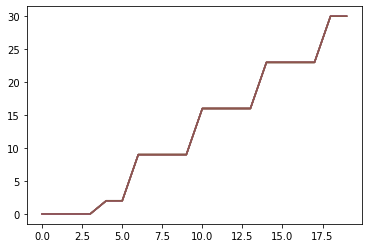

Degree: 3
t: 1
(3, 2)
[[ 0.1  0.   0.1  0.2  0. ]
 [ 0.   0.1 -0.1  0.   0. ]
 [ 0.  23.  16.   0.2 -0.1]
 [ 0.  22.  39.2  0.  -0.1]
 [ 0.   0.   0.  -0.2  0.2]]
(3, 2)
[[ 0.1 -0.1 -0.2  0.1  0. ]
 [ 0.  -0.1 -0.1 -0.1  0. ]
 [-0.1 23.1 16.2  0.   0. ]
 [ 0.  22.  39.1 -0.1  0.1]
 [-0.1  0.   0.   0.1  0. ]]
(3, 2)
[[-0.2  0.1 -0.1  0.1  0.1]
 [ 0.  -0.1  0.2  0.   0.1]
 [-0.1 23.1 16.2 -0.1  0.1]
 [ 0.1 21.9 39.   0.  -0.1]
 [ 0.1  0.1  0.   0.1 -0.1]]
(3, 2)
[[ 0.  -0.1 -0.1  0.   0. ]
 [ 0.   0.   0.1 -0.1  0. ]
 [ 0.1 22.9 15.9  0.   0.1]
 [ 0.2 22.  38.9 -0.2  0.2]
 [ 0.   0.2  0.   0.   0.1]]
(3, 2)
[[ 0.1  0.1  0.1 -0.1 -0.1]
 [ 0.   0.  -0.3  0.  -0.1]
 [-0.1 23.1 15.9 -0.1  0.1]
 [-0.1 22.  38.9 -0.1  0.2]
 [-0.1 -0.1  0.2  0.   0.2]]
(3, 2)
[[ 0.  -0.1  0.1  0.   0. ]
 [-0.1  0.2 -0.1 -0.1 -0.1]
 [-0.1 23.  16.  -0.2  0. ]
 [ 0.1 22.  38.8  0.   0. ]
 [ 0.   0.2  0.1  0.  -0.2]]
0
[[ 1.000e-01  0.000e+00  1.000e-01  2.000e-01  0.000e+00]
 [ 0.000e+00  1.000e-01 -1.000e-01  0

 [ 0.          0.2         0.1         0.         -0.2       ]]
[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0. 23. 16.  0.  0.]
 [ 0. 22. 15.  0.  0.]
 [ 0.  0.  0.  0.  0.]]
t: 5
(2, 1)
[[ 0.41075115  0.31075115  0.41075115  0.51075115  0.31075115]
 [ 0.31075115  0.41075115  0.21075115  0.31075115  0.31075115]
 [ 0.31075115 23.31075115 16.31075115  0.51075115  0.21075115]
 [ 0.31075115 22.31075115 20.27536822  0.31075115  0.21075115]
 [ 0.31075115  0.31075115  0.31075115  0.11075115  0.51075115]]
(2, 1)
[[ 0.41075115  0.21075115  0.11075115  0.41075115  0.31075115]
 [ 0.31075115  0.21075115  0.21075115  0.21075115  0.31075115]
 [ 0.21075115 23.41075115 16.51075115  0.31075115  0.31075115]
 [ 0.31075115 22.31075115 20.27536822  0.21075115  0.41075115]
 [ 0.21075115  0.31075115  0.31075115  0.41075115  0.31075115]]
(2, 1)
[[ 0.11075115  0.41075115  0.21075115  0.41075115  0.41075115]
 [ 0.31075115  0.21075115  0.51075115  0.31075115  0.41075115]
 [ 0.21075115 23.41075115 16.5107511

 [ 0.3630888   0.5630888   0.3630888   0.3630888   0.4630888 ]]
(3, 1)
[[ 0.4630888   0.4630888   0.4630888   0.2630888   0.2630888 ]
 [ 0.3630888   0.3630888   0.0630888   0.3630888   0.2630888 ]
 [ 0.2630888  14.28769627 16.2630888   0.2630888   0.4630888 ]
 [ 0.2630888  18.16237825 15.25066104  0.2630888   0.5630888 ]
 [ 0.2630888   0.2630888   0.5630888   0.3630888   0.5630888 ]]
(3, 1)
[[ 0.3630888   0.2630888   0.4630888   0.3630888   0.3630888 ]
 [ 0.2630888   0.5630888   0.2630888   0.2630888   0.2630888 ]
 [ 0.2630888  14.25436293 16.3630888   0.1630888   0.3630888 ]
 [ 0.4630888  18.22237825 15.27923247  0.3630888   0.3630888 ]
 [ 0.3630888   0.5630888   0.4630888   0.3630888   0.1630888 ]]
0
[[ 1.000e-01  0.000e+00  1.000e-01  2.000e-01  0.000e+00]
 [ 0.000e+00  1.000e-01 -1.000e-01  0.000e+00  0.000e+00]
 [ 0.000e+00  1.273e+02  1.600e+01  2.000e-01 -1.000e-01]
 [ 0.000e+00  1.179e+02  3.193e+02  0.000e+00 -1.000e-01]
 [ 0.000e+00  0.000e+00  0.000e+00 -2.000e-01  2.000e-01

 [ 0.          0.2         0.1         0.         -0.2       ]]
[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  5. 10.  0.  0.]
 [ 0. 10.  3.  0.  0.]
 [ 0.  0.  0.  0.  0.]]
t: 13
(3, 1)
[[ 0.49229703  0.39229703  0.49229703  0.59229703  0.39229703]
 [ 0.39229703  0.49229703  0.29229703  0.39229703  0.39229703]
 [ 0.39229703  9.2857267  12.05544057  0.59229703  0.29229703]
 [ 0.39229703 13.23076568 10.29845941  0.39229703  0.29229703]
 [ 0.39229703  0.39229703  0.39229703  0.19229703  0.59229703]]
(3, 1)
[[ 0.49229703  0.29229703  0.19229703  0.49229703  0.39229703]
 [ 0.39229703  0.29229703  0.29229703  0.29229703  0.39229703]
 [ 0.29229703  9.26264977 12.09544057  0.39229703  0.39229703]
 [ 0.39229703 13.26409901 10.27845941  0.29229703  0.49229703]
 [ 0.29229703  0.39229703  0.39229703  0.49229703  0.39229703]]
(3, 1)
[[ 0.19229703  0.49229703  0.29229703  0.49229703  0.49229703]
 [ 0.39229703  0.29229703  0.59229703  0.39229703  0.49229703]
 [ 0.29229703  9.293419   12.095440

 [0.41230183 0.61230183 0.41230183 0.41230183 0.51230183]]
(3, 1)
[[0.51230183 0.51230183 0.51230183 0.31230183 0.31230183]
 [0.41230183 0.41230183 0.11230183 0.41230183 0.31230183]
 [0.31230183 4.28235082 7.18187839 0.31230183 0.51230183]
 [0.31230183 8.29127503 5.27311425 0.31230183 0.61230183]
 [0.31230183 0.31230183 0.61230183 0.41230183 0.61230183]]
(3, 1)
[[0.41230183 0.31230183 0.51230183 0.41230183 0.41230183]
 [0.31230183 0.61230183 0.31230183 0.31230183 0.31230183]
 [0.31230183 4.27058612 7.25965617 0.21230183 0.41230183]
 [0.51230183 8.28358272 5.2800108  0.41230183 0.41230183]
 [0.41230183 0.61230183 0.51230183 0.41230183 0.21230183]]
0
[[ 1.000e-01  0.000e+00  1.000e-01  2.000e-01  0.000e+00]
 [ 0.000e+00  1.000e-01 -1.000e-01  0.000e+00  0.000e+00]
 [ 0.000e+00  7.130e+01  6.330e+01  2.000e-01 -1.000e-01]
 [ 0.000e+00  5.420e+01  1.516e+02  0.000e+00 -1.000e-01]
 [ 0.000e+00  0.000e+00  0.000e+00 -2.000e-01  2.000e-01]]
[[ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1. 

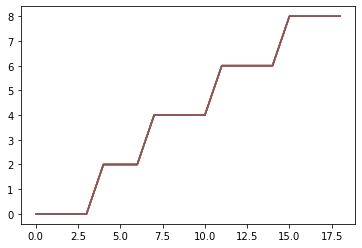

Degree: 4
t: 1
(3, 2)
[[ 0.   0.   0.1  0.1  0.1]
 [-0.1  0.   0.   0.1  0.2]
 [-0.1 23.  16.1  0.   0.1]
 [ 0.  22.  39.1  0.1  0.1]
 [ 0.   0.2  0.   0.   0. ]]
(3, 2)
[[ 0.1 -0.1  0.   0.  -0.1]
 [ 0.2 -0.1  0.   0.   0. ]
 [-0.1 23.1 16.2  0.   0. ]
 [ 0.1 22.  39.1 -0.1 -0.1]
 [ 0.   0.1 -0.1  0.2  0. ]]
(3, 2)
[[-0.3  0.1 -0.1  0.2  0.1]
 [-0.1  0.3  0.   0.1  0. ]
 [ 0.  23.  16.1  0.   0.1]
 [-0.2 21.8 38.9  0.2  0.2]
 [ 0.   0.   0.1  0.1 -0.1]]
(3, 2)
[[-0.1 -0.1  0.1  0.   0.1]
 [ 0.1  0.1  0.1  0.   0.1]
 [ 0.1 23.  16.2 -0.1  0. ]
 [-0.2 21.9 39.1 -0.1  0. ]
 [ 0.1  0.2 -0.1  0.  -0.1]]
(3, 2)
[[ 0.  -0.1  0.   0.1  0. ]
 [-0.1  0.1 -0.1 -0.1 -0.1]
 [-0.1 23.2 16.1  0.2 -0.2]
 [ 0.  22.  38.8  0.2 -0.1]
 [ 0.   0.  -0.1  0.   0. ]]
(3, 2)
[[-0.2  0.1  0.  -0.1  0.1]
 [ 0.2  0.   0.  -0.3  0.1]
 [ 0.1 22.9 16.   0.1  0. ]
 [ 0.2 21.9 39.   0.1  0.1]
 [-0.2  0.  -0.1 -0.1 -0.1]]
0
[[ 0.000e+00  0.000e+00  1.000e-01  1.000e-01  1.000e-01]
 [-1.000e-01  0.000e+00  0.000e+00  1

 [ 0.          0.         -0.1         0.          0.        ]]
5
[[-2.000e-01  1.000e-01  0.000e+00 -1.000e-01  1.000e-01]
 [ 2.000e-01  0.000e+00  0.000e+00 -3.000e-01  1.000e-01]
 [ 1.000e-01  1.383e+02  6.580e+01  1.000e-01  0.000e+00]
 [ 2.000e-01  1.264e+02  3.144e+02  1.000e-01  1.000e-01]
 [-2.000e-01  0.000e+00 -1.000e-01 -1.000e-01 -1.000e-01]]
[[ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1. 11.  6.  1.  1.]
 [ 1. 11. 26.  1.  1.]
 [ 1.  1.  1.  1.  1.]]
[[-0.2         0.1         0.         -0.1         0.1       ]
 [ 0.2         0.          0.         -0.3         0.1       ]
 [ 0.1        12.57272727 10.96666667  0.1         0.        ]
 [ 0.2        11.49090909 12.09230769  0.1         0.1       ]
 [-0.2         0.         -0.1        -0.1        -0.1       ]]
[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0. 11. 10.  0.  0.]
 [ 0. 10.  9.  0.  0.]
 [ 0.  0.  0.  0.  0.]]
t: 11
(2, 1)
[[ 0.37930689  0.37930689  0.47930689  0.47930689  0.47930689]
 [ 0.27930689  0.37

 [ 0.   0.1 -0.1  0.2  0. ]]
[[ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1. 21. 11.  1.  1.]
 [ 1. 16. 36.  1.  1.]
 [ 1.  1.  1.  1.  1.]]
[[ 0.1        -0.1         0.          0.         -0.1       ]
 [ 0.2        -0.1         0.          0.          0.        ]
 [-0.1         1.6         5.59090909  0.          0.        ]
 [ 0.1         6.0375      1.06111111 -0.1        -0.1       ]
 [ 0.          0.1        -0.1         0.2         0.        ]]
2
[[-0.3  0.1 -0.1  0.2  0.1]
 [-0.1  0.3  0.   0.1  0. ]
 [ 0.  33.1 61.4  0.   0.1]
 [-0.2 96.3 38.4  0.2  0.2]
 [ 0.   0.   0.1  0.1 -0.1]]
[[ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1. 21. 11.  1.  1.]
 [ 1. 16. 36.  1.  1.]
 [ 1.  1.  1.  1.  1.]]
[[-0.3         0.1        -0.1         0.2         0.1       ]
 [-0.1         0.3         0.          0.1         0.        ]
 [ 0.          1.57619048  5.58181818  0.          0.1       ]
 [-0.2         6.01875     1.06666667  0.2         0.2       ]
 [ 0.          0.          0

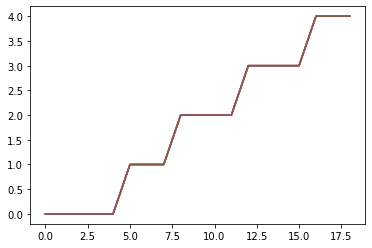

Degree: 5
t: 1
(3, 2)
[[ 0.   0.2 -0.1 -0.1 -0.1]
 [ 0.2  0.   0.1  0.   0.1]
 [-0.2 23.  16.1  0.   0. ]
 [ 0.  22.1 39.   0.1 -0.1]
 [ 0.   0.1  0.1 -0.1  0.1]]
(3, 2)
[[ 0.   0.1 -0.1  0.   0.1]
 [-0.1 -0.1  0.   0.   0. ]
 [-0.1 23.  16.   0.1 -0.3]
 [-0.3 22.2 39.1  0.   0. ]
 [ 0.1  0.1  0.2  0.1 -0.2]]
(3, 2)
[[-0.1  0.1 -0.2  0.   0. ]
 [ 0.   0.   0.2  0.  -0.1]
 [ 0.  23.  16.2  0.1  0.1]
 [-0.1 21.9 39.   0.1  0.1]
 [ 0.1 -0.2 -0.1  0.   0. ]]
(3, 2)
[[ 0.2 -0.3  0.  -0.1  0. ]
 [-0.1  0.   0.   0.   0. ]
 [ 0.  23.1 16.1  0.1  0.1]
 [ 0.1 22.  39.1  0.1  0. ]
 [ 0.   0.   0.1  0.  -0.2]]
(3, 2)
[[ 0.   0.1  0.  -0.1 -0.1]
 [ 0.1  0.1  0.1  0.   0.1]
 [ 0.2 22.8 16.   0.1 -0.1]
 [-0.1 21.9 38.9 -0.2  0. ]
 [-0.1 -0.1 -0.1  0.2  0.1]]
(3, 2)
[[ 0.1 -0.1  0.   0.   0. ]
 [ 0.   0.   0.   0.   0. ]
 [ 0.1 23.  16.2  0.   0. ]
 [-0.1 22.  39.2 -0.1  0.1]
 [ 0.2  0.   0.   0.1  0.1]]
0
[[ 0.000e+00  2.000e-01 -1.000e-01 -1.000e-01 -1.000e-01]
 [ 2.000e-01  0.000e+00  1.000e-01  0

(2, 1)
[[ 0.54169374  0.04169374  0.34169374  0.24169374  0.34169374]
 [ 0.24169374  0.34169374  0.34169374  0.34169374  0.34169374]
 [ 0.34169374 17.07200524 16.44169374  0.44169374  0.44169374]
 [ 0.44169374 16.17200524 15.06833875  0.44169374  0.34169374]
 [ 0.34169374  0.34169374  0.44169374  0.34169374  0.14169374]]
(2, 1)
[[ 0.34169374  0.44169374  0.34169374  0.24169374  0.24169374]
 [ 0.44169374  0.44169374  0.44169374  0.34169374  0.44169374]
 [ 0.54169374 17.02914809 16.34169374  0.44169374  0.24169374]
 [ 0.24169374 16.15771952 15.06033875  0.14169374  0.34169374]
 [ 0.24169374  0.24169374  0.24169374  0.54169374  0.44169374]]
(2, 1)
[[ 0.44169374  0.24169374  0.34169374  0.34169374  0.34169374]
 [ 0.34169374  0.34169374  0.34169374  0.34169374  0.34169374]
 [ 0.44169374 17.05771952 16.54169374  0.34169374  0.34169374]
 [ 0.24169374 16.17200524 15.07233875  0.24169374  0.44169374]
 [ 0.54169374  0.34169374  0.34169374  0.44169374  0.44169374]]
0
[[ 0.000e+00  2.000e-01 -1.00

 [ 0.37930689  0.37930689  0.47930689  0.37930689  0.17930689]]
(2, 1)
[[ 0.37930689  0.47930689  0.37930689  0.27930689  0.27930689]
 [ 0.47930689  0.47930689  0.47930689  0.37930689  0.47930689]
 [ 0.57930689 11.06673926 10.18622167  0.47930689  0.27930689]
 [ 0.27930689 10.14366234  9.06489972  0.17930689  0.37930689]
 [ 0.27930689  0.27930689  0.27930689  0.57930689  0.47930689]]
(2, 1)
[[ 0.47930689  0.27930689  0.37930689  0.37930689  0.37930689]
 [ 0.37930689  0.37930689  0.37930689  0.37930689  0.37930689]
 [ 0.47930689 11.08212388 10.2147931   0.37930689  0.37930689]
 [ 0.27930689 10.15135465  9.07457714  0.27930689  0.47930689]
 [ 0.57930689  0.37930689  0.37930689  0.47930689  0.47930689]]
0
[[ 0.000e+00  2.000e-01 -1.000e-01 -1.000e-01 -1.000e-01]
 [ 2.000e-01  0.000e+00  1.000e-01  0.000e+00  1.000e-01]
 [-2.000e-01  9.430e+01  7.040e+01  0.000e+00  0.000e+00]
 [ 0.000e+00  1.307e+02  2.790e+02  1.000e-01 -1.000e-01]
 [ 0.000e+00  1.000e-01  1.000e-01 -1.000e-01  1.000e-01

 [ 1.000e-01  1.000e-01  2.000e-01  1.000e-01 -2.000e-01]]
[[ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1. 25. 18.  1.  1.]
 [ 1. 20. 37.  1.  1.]
 [ 1.  1.  1.  1.  1.]]
[[ 0.          0.1        -0.1         0.          0.1       ]
 [-0.1        -0.1         0.          0.          0.        ]
 [-0.1        -1.032      -0.99444444  0.1        -0.3       ]
 [-0.3         3.055       3.00540541  0.          0.        ]
 [ 0.1         0.1         0.2         0.1        -0.2       ]]
2
[[-1.000e-01  1.000e-01 -2.000e-01  0.000e+00  0.000e+00]
 [ 0.000e+00  0.000e+00  2.000e-01  0.000e+00 -1.000e-01]
 [ 0.000e+00 -2.580e+01 -1.770e+01  1.000e-01  1.000e-01]
 [-1.000e-01  6.080e+01  1.111e+02  1.000e-01  1.000e-01]
 [ 1.000e-01 -2.000e-01 -1.000e-01  0.000e+00  0.000e+00]]
[[ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1. 25. 18.  1.  1.]
 [ 1. 20. 37.  1.  1.]
 [ 1.  1.  1.  1.  1.]]
[[-0.1         0.1        -0.2         0.          0.        ]
 [ 0.          0.          0.2       

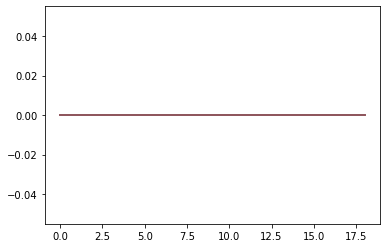

In [16]:
# Initialize field
trash = np.random.multivariate_normal(mu, sig, n)
for i in range(n):
    x = int(trash[i][0])
    y = int(trash[i][1])
    field[x][y] += 1
print(field)
    
for degree in range(k):
    print("Degree: {}".format(degree))
    # Reset matrices used for calculation 
    field_temp = field.copy()
    visits = np.zeros((k,m,m))# array to track number of visits to each gridpoint
    reward = np.zeros((k,m,m))# array of sum of rewards from each gridpoint
    expected_mean = np.zeros((k,m,m)) # array of expected mean of each gridpoint
    regret = []

    # Reset Messages
    for i in range(k):
        messageSent[i] = []
        messageRec[i] = []
        regret.append([0])

    # Initialize communication network
    graph = np.identity(k)
    if degree % 2 == 0:
        num = int(degree/2)
        for j in range(num):
            # make vertex for every (i +1) steps away
            for i in range(k):
                neighbor = int(i + j + 1)
                if neighbor > (k-1):
                    neighbor = neighbor - k
                graph[i][neighbor] = 1
                graph[neighbor][i] = 1
    else:
        num = int((degree-1)/2 + 1)
        for j in range(num):
            # make vertex for every n/2 - i steps away
            for i in range(k):
                neighbor = int(i + k/2 - j)
                if neighbor > (k-1):
                    neighbor = neighbor - k
                graph[i][neighbor] = 1
                graph[neighbor][i] = 1

    # Initialize agents
    t = 0
    for i in range(k):
        for x in range(m):
            for y in range(m):
                measure = round(np.random.normal(field_temp[x][y], var),1)
                reward[i][x][y] += measure
                visits[i][x][y] += 1

        # Calculate expected mean
        expected_mean[i] = np.divide(reward[i], visits[i])

    t += 1
    while np.max(field_temp) > thresh:
        print("t: {}".format(t))
        index = []
        for i in range(k):
            # Select arm with highest expected Q value
            Q = expected_mean[i] + var*np.divide(math.sqrt(2*(xi + 1)*math.log(t)),np.sqrt(visits[i]))
            ind = np.unravel_index(np.argmax(Q), Q.shape)
            measure = np.round(np.random.normal(field_temp[ind], var),1)
            index.append(ind)

            print(ind)
            print(Q)

            # Calculate regret
            optimal_ind = np.unravel_index(np.argmax(field_temp), field_temp.shape)
            max_reward = field_temp[optimal_ind]
            actual_reward = field_temp[ind]
            regret[i].append(max_reward - actual_reward)                


            # Make message to send to neighboring agents
            message = (t, i, ind, measure)
            send = messageSent[i]
            if len(send) == gamma:
                send.pop(0)
            send.append(message)
            messageSent[i] = send

        # Pick up trash from selected grid points
        for i in range(len(index)):
            ind = index[i]
            field_temp[ind] -= 1


        # receive messages from neighbors and adjust expected mean
        for i in range(k):
            print(i)
            new_visits= np.zeros((m,m))
            # compare new messages with history of messages and skip any repeats
            for j in range(k):
                if graph[i][j] == 1:
                    received = messageRec[i]
                    sent = messageSent[j]
                    for l in range(len(sent)):
                        msg = sent[l]
                        if received.count(msg) == 0:
                            received.append(msg)
                            ind = msg[2]
                            visits[i][ind] += 1
                            new_visits[ind] += 1
                            reward[i][ind] += msg[3]
                    messageRec[i] = received

            # calculate expected mean
            reward[i] -= np.multiply(new_visits, visits[i])
            expected_mean[i] = np.divide(reward[i], visits[i])
            print(reward[i])
            print(visits[i])
            print(expected_mean[i])           
        # Next time step
        print(field_temp)
        t += 1
    # Graph regret over time
    time = np.arange(t)
    cum_regret = np.cumsum(regret, axis = 1)
    print(np.array(cum_regret))
    for i in range(k):
        plt.plot(cum_regret[i])
    plt.show()

In [14]:
print(field)
print(t)
print(np.shape(regret))
print(np.array(regret))

[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0. 26. 24.  0.  0.]
 [ 0. 25. 25.  0.  0.]
 [ 0.  0.  0.  0.  0.]]
16
(6, 16)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


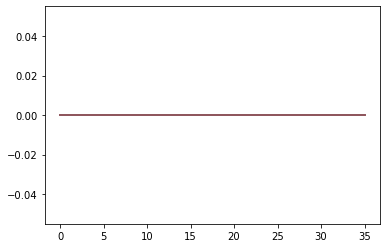

In [312]:
# Graph regret over time
time = np.arange(t)
cum_regret = np.cumsum(regret, axis = 1)
print(np.array(cum_regret))
for i in range(k):
    plt.plot(cum_regret[i])
plt.show()